<a href="https://colab.research.google.com/github/FranciscoHernandez1998/lab1-SP1/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['Camisa o blusa', 'Pants', 'Sueter', 'Vestido', 'Abrigo','Sandalia', 'Playera', 'Tenis', 'Bolso', 'Bota']


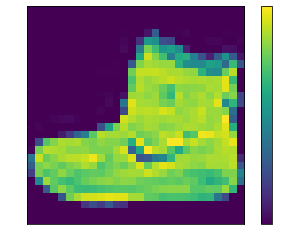

In [0]:
#plt.imshow(train_images[0])
#plt.title(class_names[train_labels[0]])
#plt.axis('off')
#plt.show()
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [0]:
#train_images = (train_images-np.mean(train_images)) / np.std(train_images)
#train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images / 255.0))

#test_images = (test_images-np.mean(test_images)) / np.std(test_images)
#test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255.0))

#train_images.shape, test_images.shape
train_images = train_images / 255.0
test_images = test_images / 255.0


Text(0.5, 1.0, 'Bota')

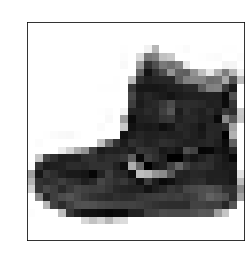

In [0]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
#plt.show()

## Explore final dataset

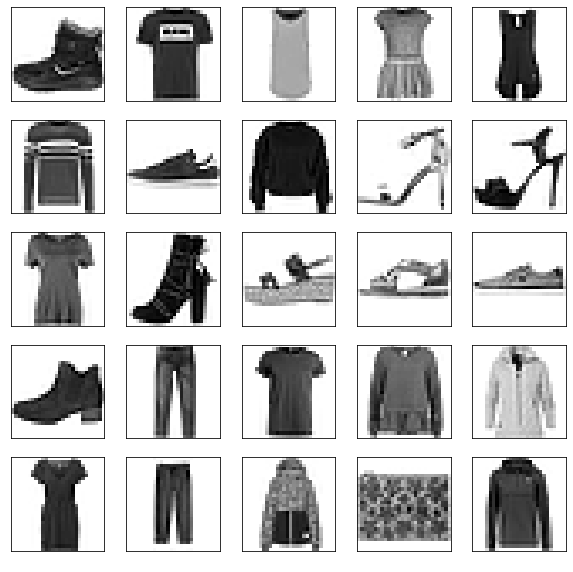

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=10
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 90us/sample - loss: 0.8345 - accuracy: 0.7311 - val_loss: 0.6006 - val_accuracy: 0.8000
Epoch 2/10
42000/42000 [==============================] - 4s 84us/sample - loss: 0.5534 - accuracy: 0.8133 - val_loss: 0.5282 - val_accuracy: 0.8204
Epoch 3/10
42000/42000 [==============================] - 4s 84us/sample - loss: 0.5009 - accuracy: 0.8286 - val_loss: 0.4848 - val_accuracy: 0.8312
Epoch 4/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.4720 - accuracy: 0.8363 - val_loss: 0.4692 - val_accuracy: 0.8398
Epoch 5/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.4525 - accuracy: 0.8439 - val_loss: 0.4621 - val_accuracy: 0.8399
Epoch 6/10
42000/42000 [==============================] - 3s 83us/sample - loss: 0.4370 - accuracy: 0.8493 - val_loss: 0.4414 - val_accuracy: 0.8492
Epoch 7/10
42000/42000 [==============================] 

# Evaluate

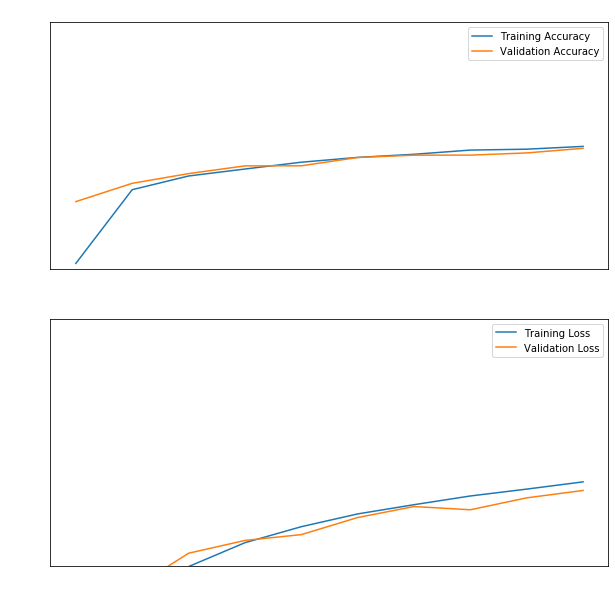

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,0.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.4326468101501465
Accuracy: 0.8494


# Make predictions

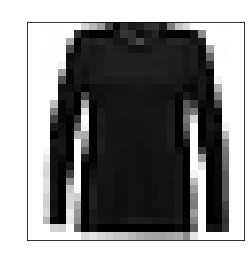


Predicted class is: Playera


In [0]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])


Predicted class is: Bolso


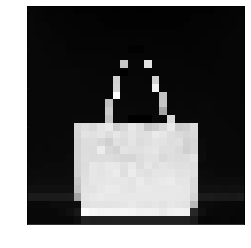

In [0]:
test_image = tf.keras.utils.get_file('bolso.jpg','https://www.deusapacolombia.com/wp-content/uploads/2013/06/bolso.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])